In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
training_set=df.iloc[:,1:2]

In [4]:
training_set

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
...,...
1253,790.90
1254,790.68
1255,793.70
1256,783.33


In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
sc=MinMaxScaler(feature_range=(0,1))

In [7]:
training_set_scaled=sc.fit_transform(training_set)

In [8]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [9]:
X_train=[]
y_train=[]

In [10]:
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

In [11]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

Using TensorFlow backend.


In [13]:
regressor=Sequential()

In [14]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(rate=0.2))

In [15]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(rate=0.2))

In [16]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(rate=0.2))

In [17]:
regressor.add(Dense(units=1))

In [18]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [19]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0443
Epoch 2/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0068
Epoch 3/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0053
Epoch 4/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0056
Epoch 5/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0047
Epoch 6/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0049
Epoch 7/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0047
Epoch 8/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0038
Epoch 10/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0040
Epoch 11/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0041
Epoch 12/100
1198/1198 [==============================] - 4s 3ms/step - lo

1198/1198 [==============================] - 4s 3ms/step - loss: 0.0014
Epoch 98/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0012


In [21]:
dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price=dataset_test.iloc[:,1:2].values

In [23]:
dataset_total=pd.concat((df['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

In [25]:
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

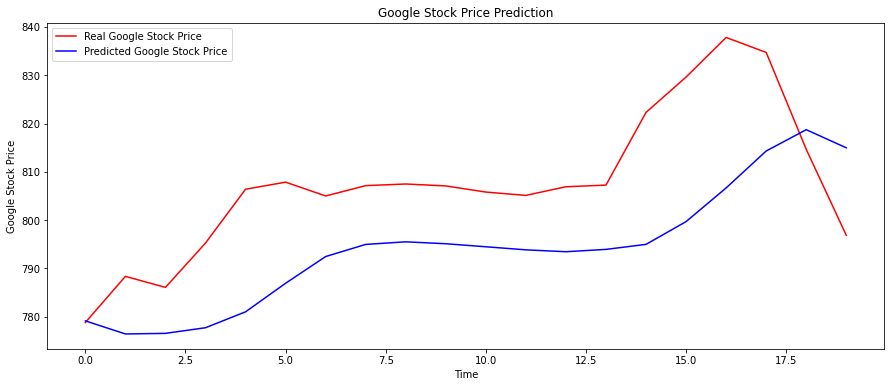

In [28]:
plt.figure(figsize=(15,6))
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()